# Data Science Metodology

## Business Understanding

***What's the problem that you are trying to solve?***

We want predict if a client will a default in their credit.

We have information of six months clients credit card of a bank in Taiwan.

We can predict if it happen a default in their credit cards?


## Analytic Approach

***How can you use data to answer the question?***

We have customer information six months in advance, so we want to see if with that data we can predict if the client will is default. This will be investigate with a decision tree.

## Data Requirements

***What are data requirements?***

The data requirements are:
1. Amount of the given credit (NT dollar).
2. Gender.
3. Education
4. Marital status 
5. History of past payment. We tracked the past monthly payment records (from April to September,2005)
6. Amount of bill statement (NT dollar).
7. Amount of previous payment (NT dollar).

# Data Collection

We collect the data in the follow link and show it.

In [148]:
import pandas as pd

In [149]:
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", 
                  columns= None)

In [150]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


This investigation use the following 23 variables as explanatory variables:
1.  X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
2.  X2: Sex (1 = male; 2 = female).
3.  X3: Education (1 = graduate school; 2 = university; 3 = high school).
4.  X4: Marital status (1 = married; 2 = single).
5.  X5: Age (year).
6.  X6–X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .; X11 = the repayment status in April, 2005. The measurement scale for the repayment status is:
    1. -1 = pay duly;
    2. 1 = payment delay for one month;
    3. 2 = payment delay for two months; . . .; 
    4. 8 = payment delay for eight months; 
    5. 9 = payment delay for nine months and above.
7.  X12–X17: Amount of bill statement (NT dollar). 
    1. X12 = amount of bill statement in September, 2005;
    2. X13 = amount of bill statement in August,2005; . . .; 
    3. X17 = amount of bill statement in April, 2005.
8. X18–X23: Amount of previous payment (NT dollar).
    1. X18 = amount paid in September, 2005; 
    2. X19 = amount paid in August, 2005; . . .; 
    3. X23 = amount paid in April, 2005.

### Passing to data preparation.

In [151]:
# Rename the columns
df.columns= df.iloc[0]

In [152]:
# Eliminate the first row
df = df.iloc[1:] 

In [153]:
# We eliminate the NaN values
df.dropna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [154]:
# Change columns names to lower
col = []
for c in df.columns:
    col.append(c.lower())
# Change de name in the last columns
df.columns = col
old_col = df.columns
tmp = list(old_col[0:len(old_col)-1])
tmp.append('default')
df.columns = tmp
df

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [155]:
# Eliminating the first column named 'id' 
df = df.iloc[:, 1:]
df


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [156]:
# elimination row what we don't need
df = df.loc[df.education.isin([1, 2, 3])]
df = df.loc[df.marriage.isin([1, 2])]

***we don't normalize the dataset because in random forest is not necessary***

## Modeling and Evaluation

In [157]:
# We separated the train and test subset
df.default.value_counts()



0    22649
1     6514
Name: default, dtype: int64

We can see the distribution in the output, We create the sample with 20% of 0's and 20 % of 1's in attribute default.

We create a sample for train and test sets

In [158]:
df_tmp_1 = df[df.default == 1]
df_tmp_0 = df[df.default == 0]

train_set_1 = df_tmp_1.sample(frac=0.8, random_state=0)
train_set_0 = df_tmp_0.sample(frac=0.8, random_state=0)

test_mask = df_tmp_1.index.isin(train_set_1.index)
test_set_1 = df_tmp_1[~test_mask]

test_mask = df_tmp_0.index.isin(train_set_0.index)
test_set_0 = df_tmp_0[~test_mask]


Concatenate the train sample and the test sample

In [159]:
train_set = pd.concat([train_set_1, train_set_0])
train_set

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
10554,130000,2,1,2,30,2,0,0,2,0,...,120259,121205,124778,4527,10122,1,4355,8918,0,1
8967,40000,2,3,2,23,2,2,2,0,0,...,34985,35719,36428,1600,0,1250,1296,1302,1348,1
4518,50000,1,1,2,38,-1,-1,-1,-1,-1,...,390,390,5010,390,390,390,390,5010,390,1
16260,60000,2,2,1,40,2,2,2,2,0,...,32902,30677,31318,3700,2000,0,1059,1096,1114,1
16434,30000,2,3,1,55,0,0,0,0,0,...,13507,13782,14159,1200,1214,1300,500,600,2900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,230000,2,2,2,25,0,0,0,0,0,...,87654,90172,86850,4500,4114,3500,4000,3000,3000,0
17399,70000,2,2,1,33,0,0,0,0,0,...,61902,19551,27831,53000,26017,40000,17000,24000,28000,0
15005,270000,2,2,1,32,0,0,0,0,0,...,123905,105064,105600,6500,6843,6284,3617,3716,4035,0
28335,260000,2,1,2,33,-1,-1,-1,-1,-1,...,3600,2250,1650,460,0,3600,2250,0,0,0


In [160]:
test_set = pd.concat([test_set_0, test_set_1])
test_set

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
13,630000,2,2,2,41,-1,0,-1,-1,-1,...,6500,6500,2870,1000,6500,6500,6500,2870,0,0
19,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29,50000,2,3,1,47,-1,-1,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
40,280000,1,1,2,31,-1,-1,2,-1,0,...,9976,17976,9477,9075,0,9976,8000,9525,781,0
57,180000,2,3,1,34,0,0,0,-1,-1,...,7142,-679,8321,8500,1500,7500,679,9000,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29881,140000,1,2,1,38,0,0,0,0,0,...,75815,65099,66445,4494,5303,2806,1825,1880,1901,1
29909,140000,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
29912,210000,1,2,1,31,-1,-1,-1,-1,-1,...,326,652,326,326,326,326,652,0,326,1
29936,50000,1,2,1,48,0,0,0,-1,0,...,49161,6690,5665,46895,1775,51209,428,5665,8745,1


We separated the target

In [161]:
y_train = train_set.iloc[:,-1]
y_train

10554    1
8967     1
4518     1
16260    1
16434    1
        ..
1576     0
17399    0
15005    0
28335    0
23326    0
Name: default, Length: 23330, dtype: object

In [162]:
X_train = train_set.iloc[:, :train_set.shape[1]-1]
X_train

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
10554,130000,2,1,2,30,2,0,0,2,0,...,123658,120259,121205,124778,4527,10122,1,4355,8918,0
8967,40000,2,3,2,23,2,2,2,0,0,...,34305,34985,35719,36428,1600,0,1250,1296,1302,1348
4518,50000,1,1,2,38,-1,-1,-1,-1,-1,...,390,390,390,5010,390,390,390,390,5010,390
16260,60000,2,2,1,40,2,2,2,2,0,...,46549,32902,30677,31318,3700,2000,0,1059,1096,1114
16434,30000,2,3,1,55,0,0,0,0,0,...,12421,13507,13782,14159,1200,1214,1300,500,600,2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,230000,2,2,2,25,0,0,0,0,0,...,93143,87654,90172,86850,4500,4114,3500,4000,3000,3000
17399,70000,2,2,1,33,0,0,0,0,0,...,67450,61902,19551,27831,53000,26017,40000,17000,24000,28000
15005,270000,2,2,1,32,0,0,0,0,0,...,122249,123905,105064,105600,6500,6843,6284,3617,3716,4035
28335,260000,2,1,2,33,-1,-1,-1,-1,-1,...,0,3600,2250,1650,460,0,3600,2250,0,0


In [163]:
y_test = test_set.iloc[:, -1]
y_test

13       0
19       0
29       0
40       0
57       0
        ..
29881    1
29909    1
29912    1
29936    1
29998    1
Name: default, Length: 5833, dtype: object

In [164]:
X_test = test_set.iloc[:, :test_set.shape[1]-1]
X_test

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
13,630000,2,2,2,41,-1,0,-1,-1,-1,...,6500,6500,6500,2870,1000,6500,6500,6500,2870,0
19,360000,2,1,1,49,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29,50000,2,3,1,47,-1,-1,-1,-1,-1,...,3416,2040,30430,257,3415,3421,2044,30430,257,0
40,280000,1,1,2,31,-1,-1,2,-1,0,...,4641,9976,17976,9477,9075,0,9976,8000,9525,781
57,180000,2,3,1,34,0,0,0,-1,-1,...,8441,7142,-679,8321,8500,1500,7500,679,9000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29881,140000,1,2,1,38,0,0,0,0,0,...,141532,75815,65099,66445,4494,5303,2806,1825,1880,1901
29909,140000,1,1,2,29,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29912,210000,1,2,1,31,-1,-1,-1,-1,-1,...,326,326,652,326,326,326,326,652,0,326
29936,50000,1,2,1,48,0,0,0,-1,0,...,46895,49161,6690,5665,46895,1775,51209,428,5665,8745


We use Random Forest for the modeling

In [171]:
# We change the type of the subsets for use of Random Forest
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test = X_test.astype(int)
y_test = y_test.astype(int)

In [172]:
from sklearn import ensemble
from collections import Counter
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_test)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


We calculate the confusion matriz

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import itertools
ccc_confusion_matrix = confusion_matrix(y_test, predict_rfc)

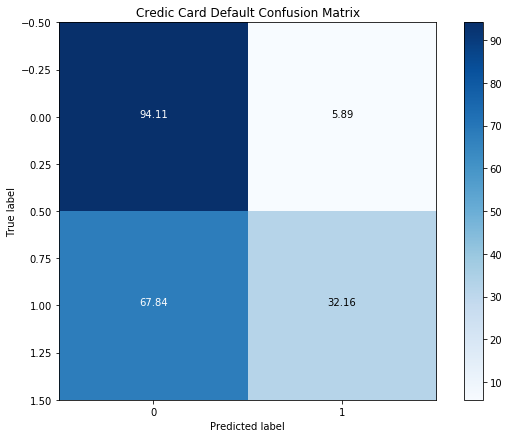

In [197]:
title = 'Credic Card Default Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
ccc_confusion_matrix = (
    ccc_confusion_matrix.astype('float') / ccc_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(ccc_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(y_test))
plt.xticks([0, 1], [0, 1])


fmt = '.2f'
thresh = ccc_confusion_matrix.max() / 2.
for i, j in itertools.product(range(ccc_confusion_matrix.shape[0]), range(ccc_confusion_matrix.shape[1])):
    plt.text(j, i, format(ccc_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if ccc_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

*** Here we can see that the modeling predicts with 99% when the client will not fall in default of his payment.
It can also be seen that the model predicts only 32% when the client falls into default.
Unfortunately it is not a very effective model but because the methodology is cyclical we can review from data requirements to modeling to see how to improve the prediction. ***
